In [2]:
import requests
import json
import re
from pathlib import Path
from datetime import date

import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index, Categorical

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# For Supervised Learning
from sklearn.model_selection import cross_val_predict,cross_val_score

# For Linear Binary Classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

# For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# For K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [3]:
df =pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df.sample(n=5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
98471,0,23.0,0,0,former,29.19,6.0,145,0
25429,0,14.0,0,0,No Info,19.80,6.2,130,0
12671,0,58.0,0,0,never,24.05,6.2,159,0
74098,1,41.0,0,0,No Info,27.32,4.8,158,0
85740,1,24.0,0,0,current,29.24,6.2,158,0


In [5]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
replaceNumber = {'never': 0, 'current': 1, 'ever': 2, 'former': 2, 'not current': 2}
df['smoking_history'] = df['smoking_history'].replace(replaceNumber)

In [7]:
df = df[df['smoking_history'] != 'No Info']

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,0,34.34,6.5,160,0
99993,0,40.0,0,0,0,40.69,3.5,155,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [9]:
trainingData,testData = train_test_split(df, test_size=0.1, train_size=0.9, shuffle=True)

In [10]:
trainingData.shape

(57765, 9)

In [11]:
testData.shape

(6419, 9)

In [47]:
featureColumns=['heart_disease', 'bmi', 'hypertension', 'blood_glucose_level']
responseColumn=['diabetes']

In [48]:
trainingFeatures=trainingData[featureColumns].to_numpy()
trainingResponses=trainingData[responseColumn].to_numpy()
testFeatures=testData[featureColumns].to_numpy()
testResponses=testData[responseColumn].to_numpy()

In [49]:
sgdCancelationModelManuallySplit = SGDClassifier()

In [50]:
sgdCancelationModelManuallySplit.fit(trainingFeatures, trainingResponses)

/Users/joewhallon/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [51]:
predictedTestResponses=sgdCancelationModelManuallySplit.predict(testFeatures)

In [52]:
np.sum(predictedTestResponses==testResponses)/len(testData)

5303.688113413305

In [53]:
allDataFeatures=df[featureColumns].to_numpy()
allDataResponses=df[responseColumn].to_numpy()

/Users/joewhallon/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joewhallon/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joewhallon/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joewhallon/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d arr

<BarContainer object of 10 artists>

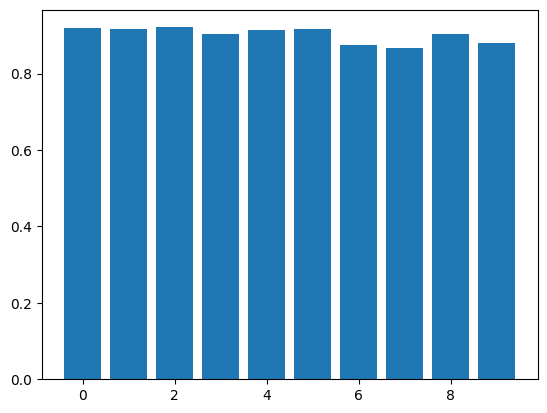

In [54]:
sgdCancelationModelCrossSplit = SGDClassifier(random_state=42)
accuracies=cross_val_score(sgdCancelationModelCrossSplit, allDataFeatures, allDataResponses, cv=10, scoring="accuracy")
plt.bar(x=list(range(len(accuracies))),height=accuracies)

In [55]:
accuracies

array([0.92070416, 0.91665368, 0.92132731, 0.90450226, 0.9153942 ,
       0.91695232, 0.87441571, 0.86584606, 0.90401994, 0.8809598 ])

In [56]:
manuallySplitConfusion = confusion_matrix(testResponses, predictedTestResponses)
confusion=DataFrame(manuallySplitConfusion)
confusion.index=['neg','pos']
confusion.index.name='expected'
confusion.columns=['neg','pos']
confusion.columns.name='predicted'
confusion

predicted,neg,pos
expected,,
neg,5508,246
pos,343,322


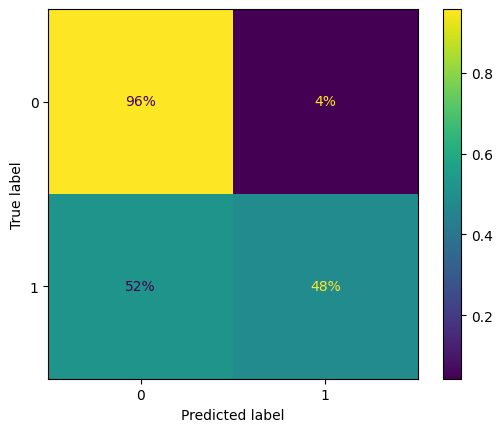

In [57]:
ConfusionMatrixDisplay.from_predictions(testResponses, predictedTestResponses,
                                       normalize="true",values_format=".0%")
plt.show()